In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

## 1. PROBLEM STATEMENT

## 2.Loading Dataset

In [3]:
df = pd.read_csv("/content/aiml dataset.csv")

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.Like.value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df.shape

(1453, 15)

In [8]:
df['Like']

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object

In [9]:
df.isnull().any()

yummy             False
convenient        False
spicy             False
fattening         False
greasy            False
fast              False
cheap             False
tasty             False
expensive         False
healthy           False
disgusting        False
Like              False
Age               False
VisitFrequency    False
Gender            False
dtype: bool

In [10]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

from the above we can see that there are no null values

In [11]:
df.duplicated().sum()

22

In [12]:
# Identifying duplicate rows
duplicate_rows = df[df.duplicated()]

# Displaying the duplicate rows
print(duplicate_rows)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
404    Yes        Yes    No        No     No  Yes   Yes   Yes        No   
421    Yes        Yes    No       Yes    Yes  Yes    No   Yes       Yes   
441     No        Yes    No       Yes     No  Yes   Yes    No        No   
453    Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
598     No        Yes    No       Yes    Yes  Yes   Yes    No        No   
674    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
710    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No   
725     No        Yes    No       Yes    Yes  Yes   Yes    No        No   
741    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
744    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
745    Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
774    Yes        Yes    No       Yes     No  Yes   Yes   Yes        No   
799    Yes        Yes    

In [13]:
#df.drop_duplicates(inplace=True)
#df.shape

In [14]:
df.duplicated().sum()

22

## 3. CLEANING THE 'LIKE' COLUMN

In [15]:
df['Like'] = df['Like'].replace({'I love it!\+(\d+)': r'\1', 'I hate it!\-(\d+)': r'-\1'}, regex=True)

In [16]:
df['Like'] = pd.to_numeric(df['Like'], errors='coerce', downcast='integer')

In [17]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


## Encoding the variables

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender','VisitFrequency']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [19]:
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'Every three months': 0,
 'More than once a week': 1,
 'Never': 2,
 'Once a month': 3,
 'Once a week': 4,
 'Once a year': 5}

In [20]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


## EDA

## UNIVARIATE ANALYSIS

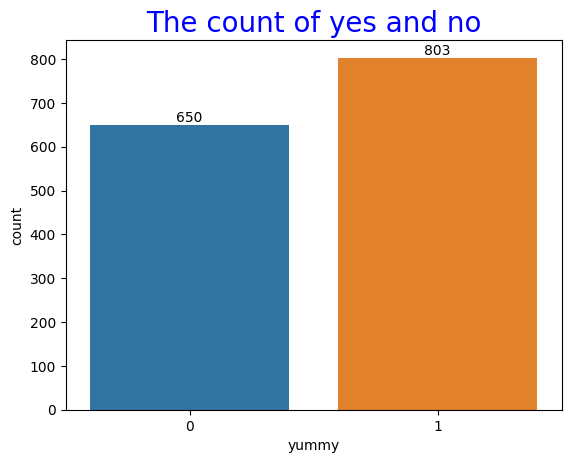

In [21]:
count=sns.countplot(x=df.yummy,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of yes and no",color='b',size=20)
plt.show()

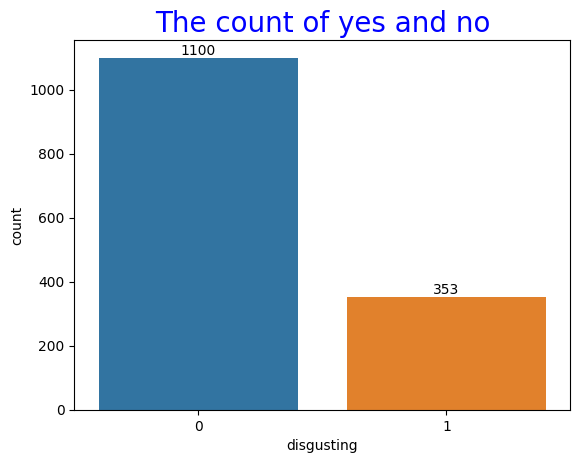

In [22]:
count=sns.countplot(x=df.disgusting,data=df)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of yes and no",color='b',size=20)
plt.show()

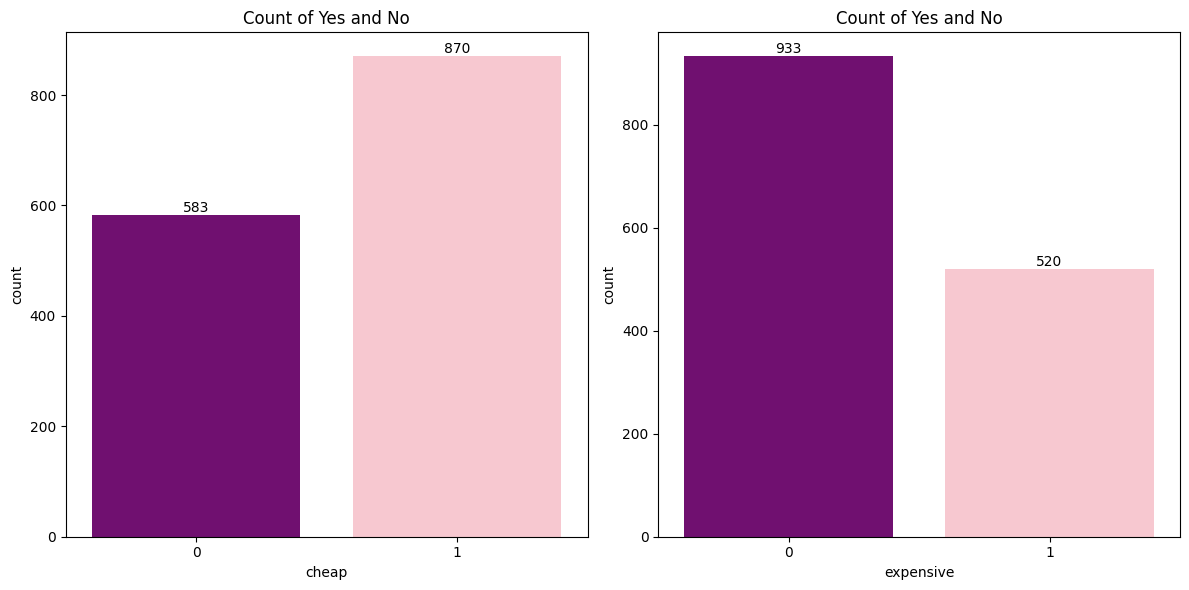

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns for two plots side by side

# Plotting countplots with count labels
for i, column in enumerate(['cheap', 'expensive']):
    count = sns.countplot(x=column, data=df, ax=axes[i],palette=['purple','pink'])
    count.bar_label(count.containers[0])  # Add count labels
    axes[i].set_title(f'Count of Yes and No')

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

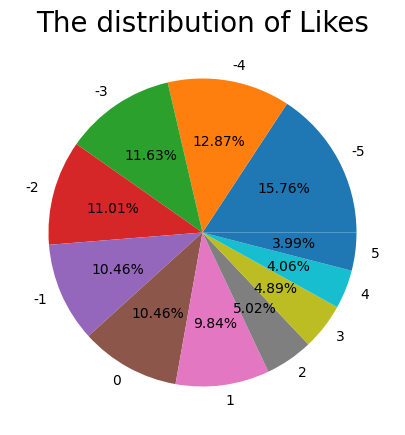

In [24]:
plt.figure(figsize=(10,5))
plt.pie(df.Like.value_counts().values,
    labels=['-5','-4','-3','-2','-1','0','1','2','3','4','5'],autopct='%1.2f%%')
plt.title("The distribution of Likes",color='black',size=20)
plt.show()

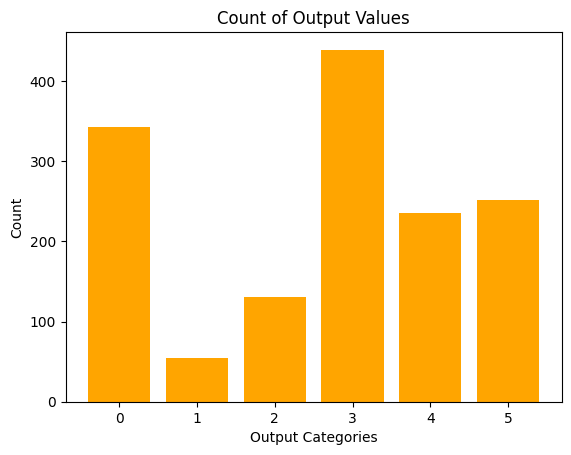

In [25]:

value_counts = df['VisitFrequency'].value_counts()
plt.bar(value_counts.index, value_counts.values,color='orange')
plt.title('Count of Output Values')
plt.xlabel('Output Categories')
plt.ylabel('Count')
plt.show()

## Bivariate analysis

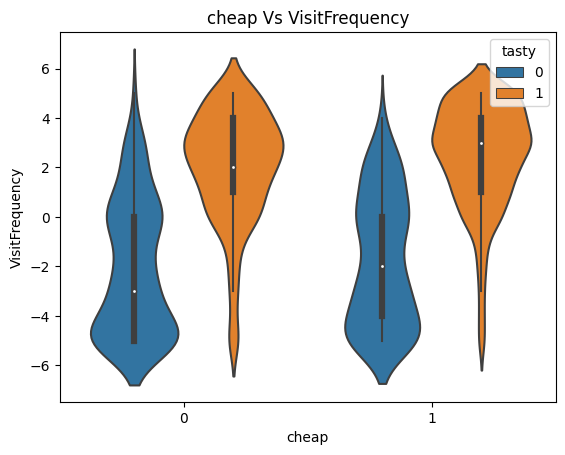

In [26]:
sns.violinplot(x='cheap', y='Like',hue='tasty',data=df)
plt.xlabel('cheap')
plt.ylabel('VisitFrequency')
plt.title('cheap Vs VisitFrequency')
plt.show()

<ipython-input-27-e51b4f8e28fe>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="VisitFrequency", y="Age",data=df,  palette="Set2",orient="v", height=5, aspect=2,kind="swarm")


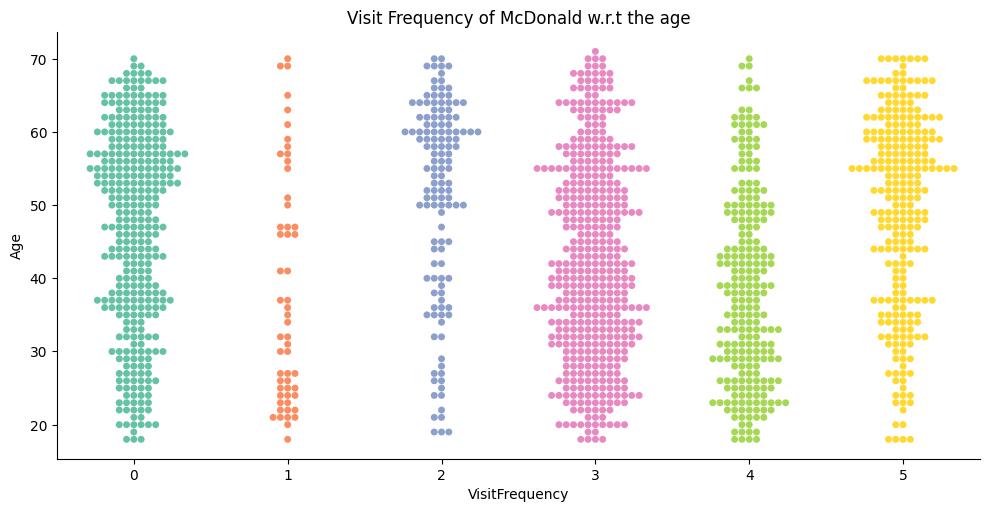

In [27]:
sns.catplot(x="VisitFrequency", y="Age",data=df,  palette="Set2",orient="v", height=5, aspect=2,kind="swarm")
plt.title('Visit Frequency of McDonald w.r.t the age')
plt.show()

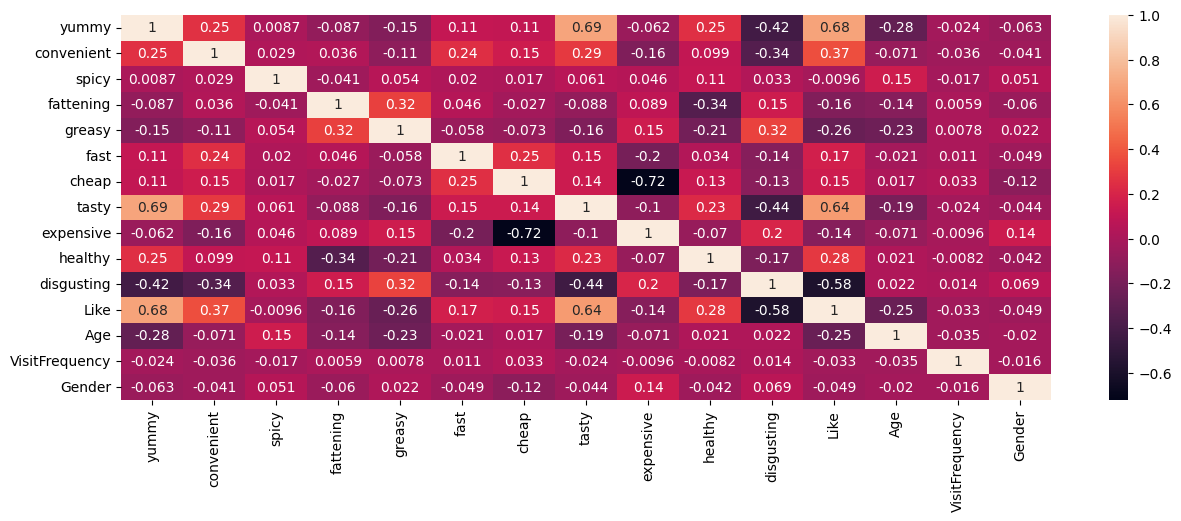

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

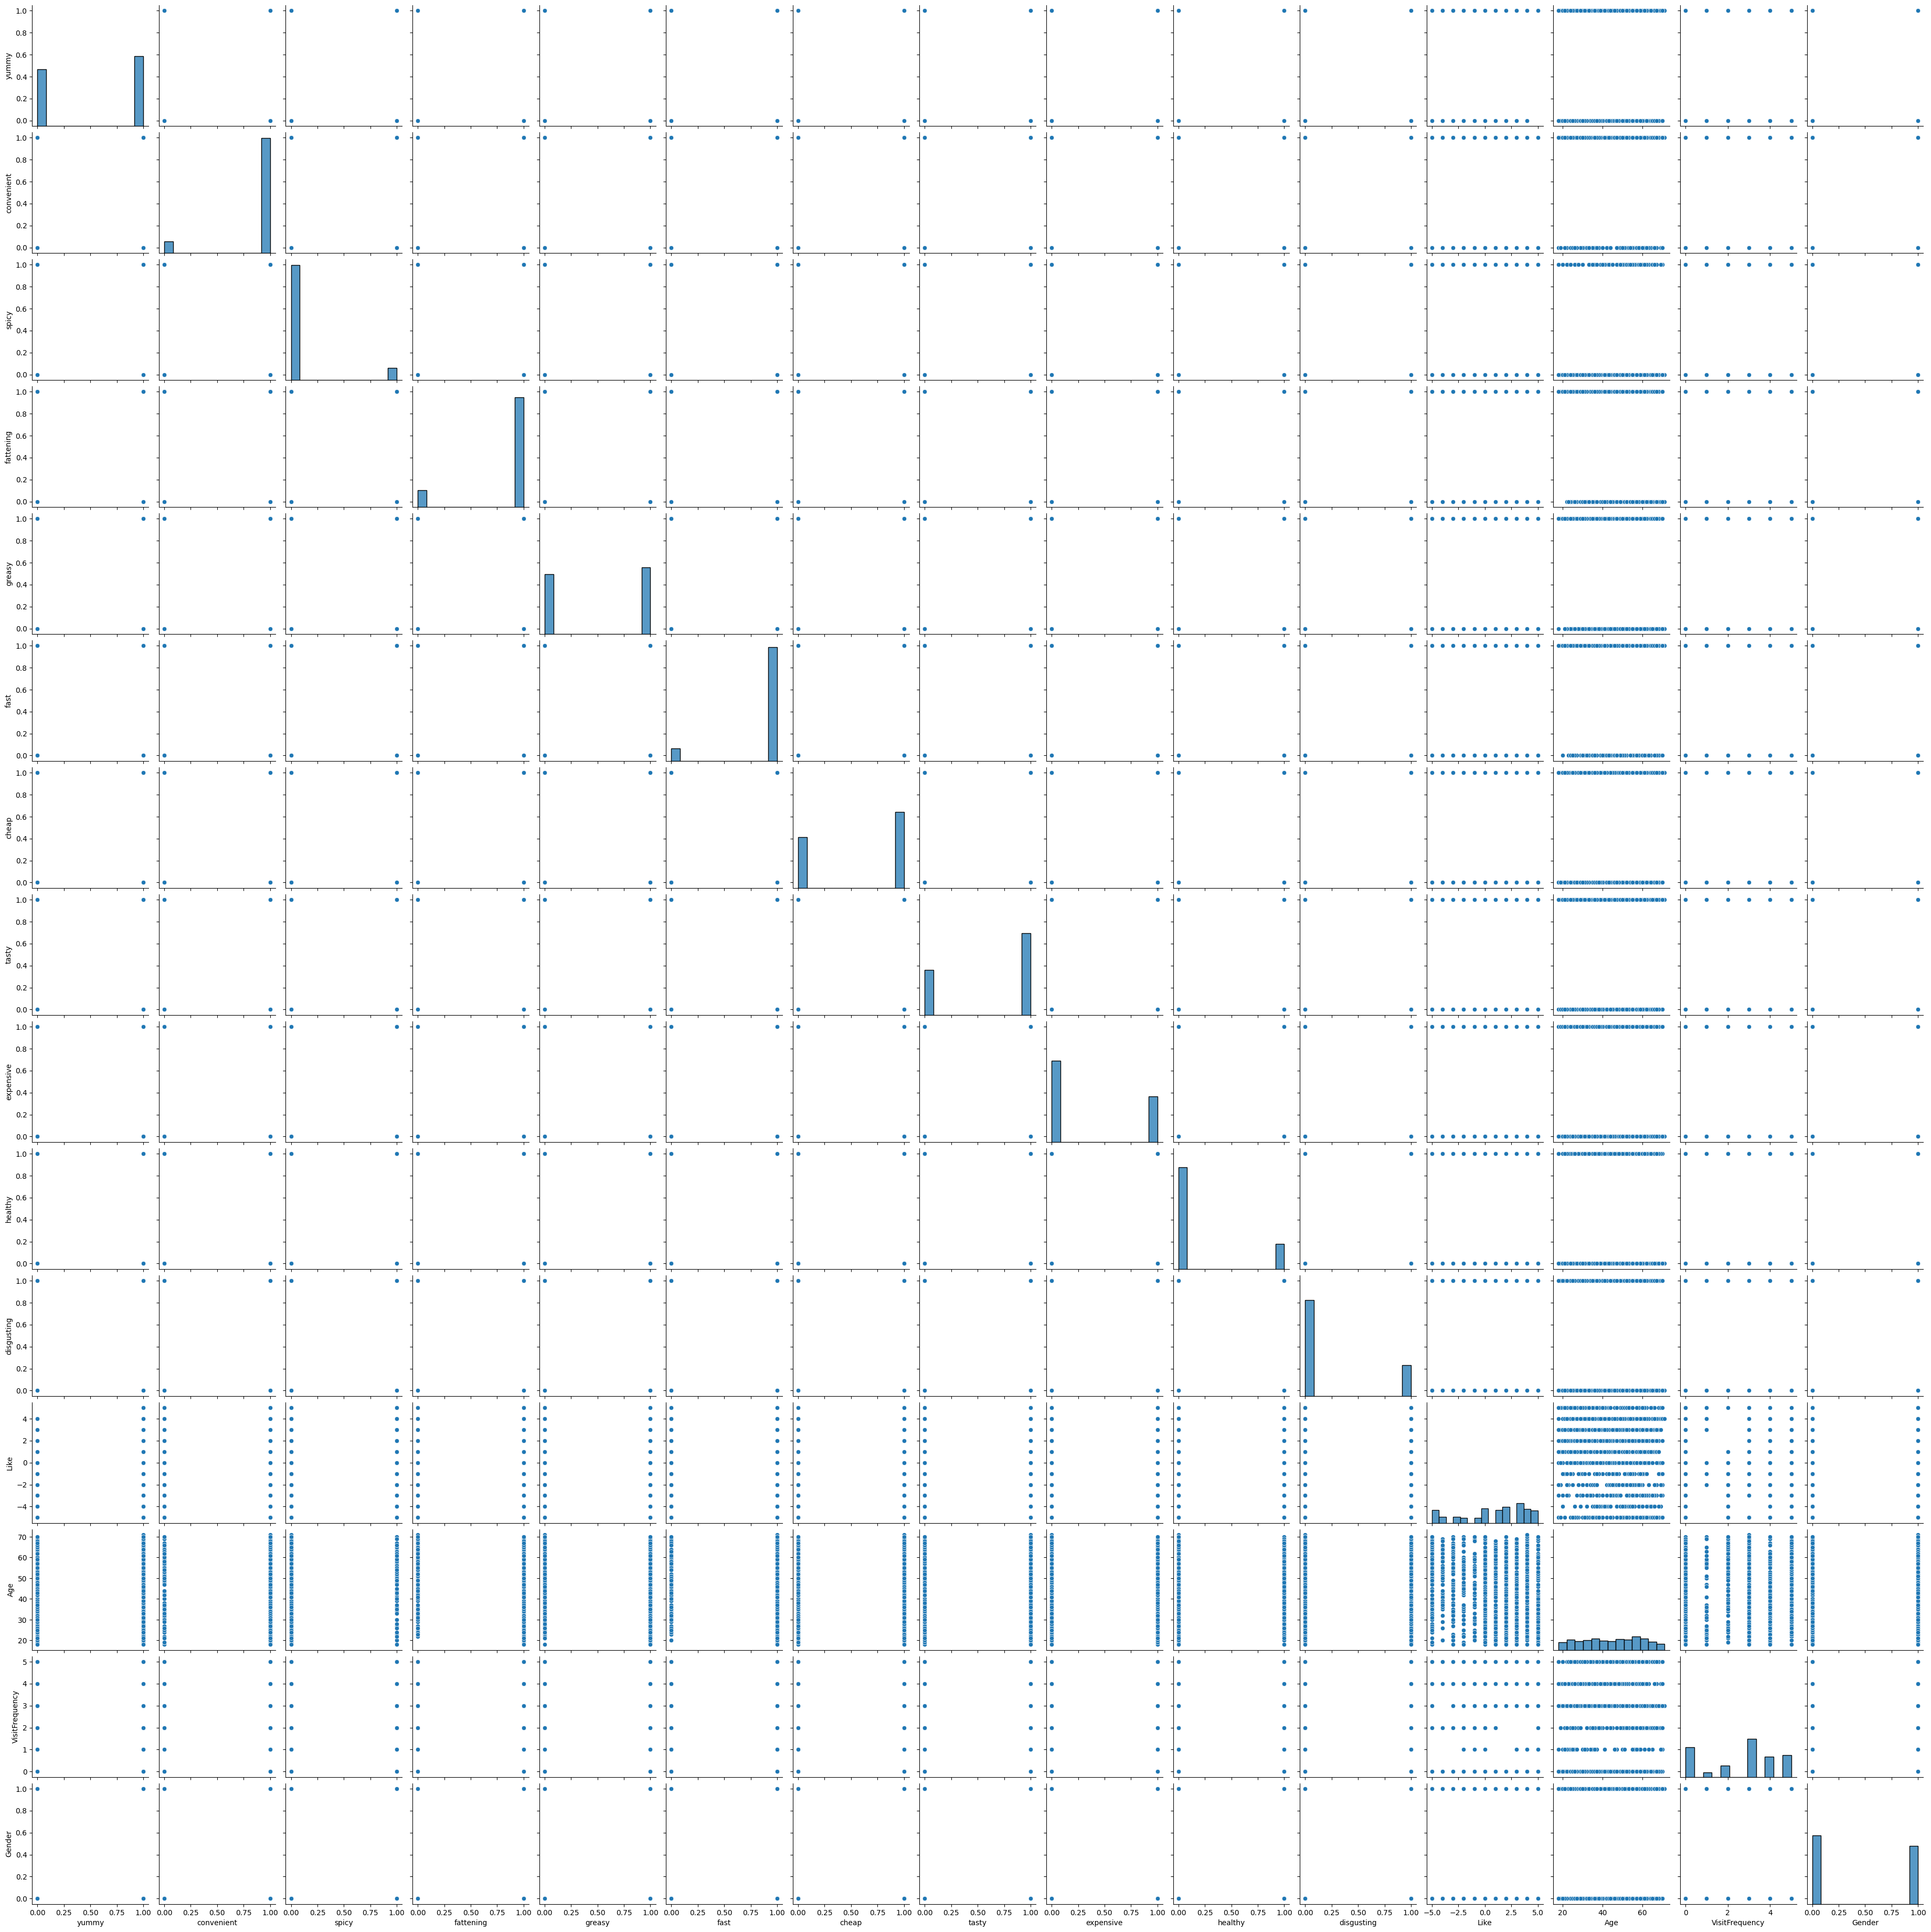

In [29]:
sns.pairplot(df)
plt.show()

## descriptive analysis

In [30]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,5.000000,1.000000


In [31]:
df.skew()

yummy            -0.211995
convenient       -2.821579
spicy             2.793420
fattening        -2.165954
greasy           -0.106246
fast             -2.673256
cheap            -0.403401
tasty            -0.602948
expensive         0.593549
healthy           1.510189
disgusting        1.200012
Like             -0.538931
Age              -0.090070
VisitFrequency   -0.332942
Gender            0.170090
dtype: float64

## Handling Outliers

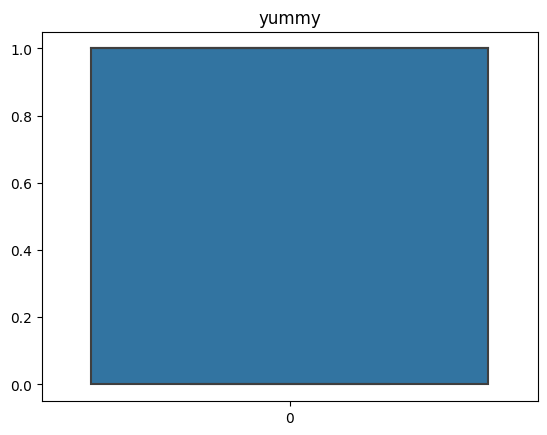

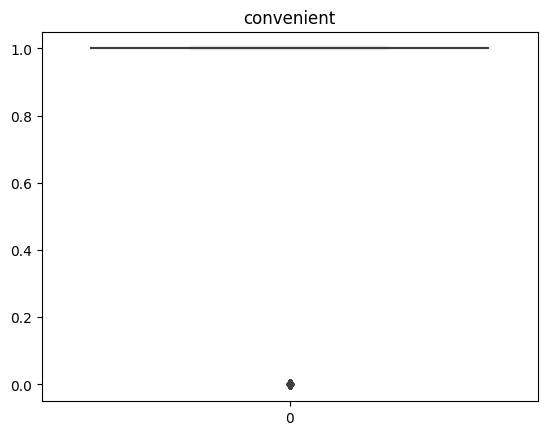

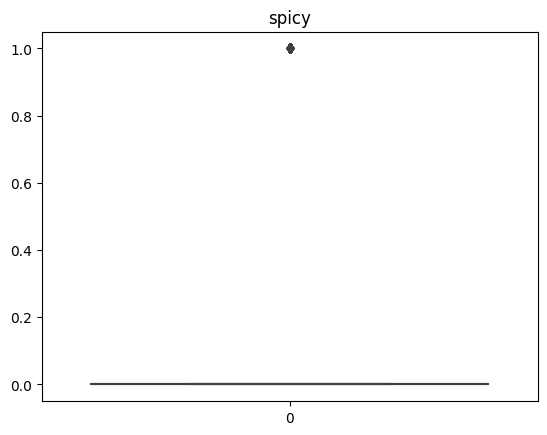

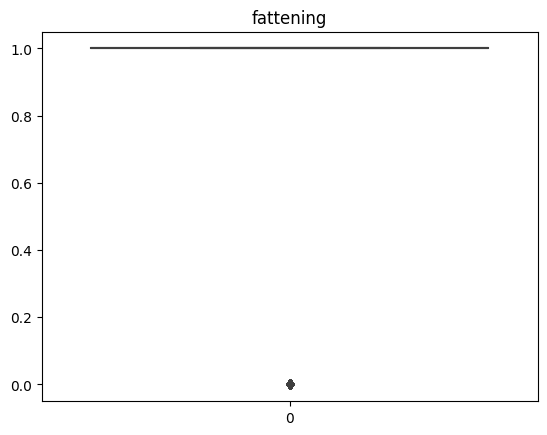

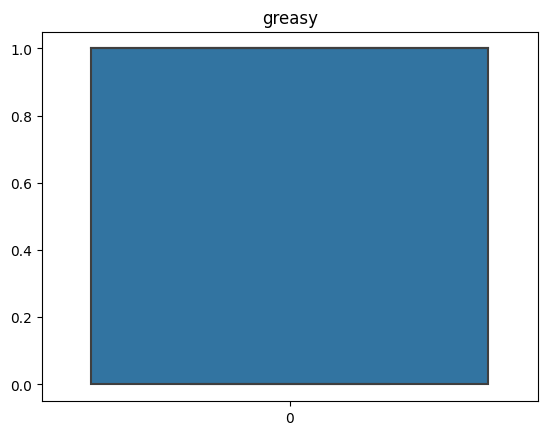

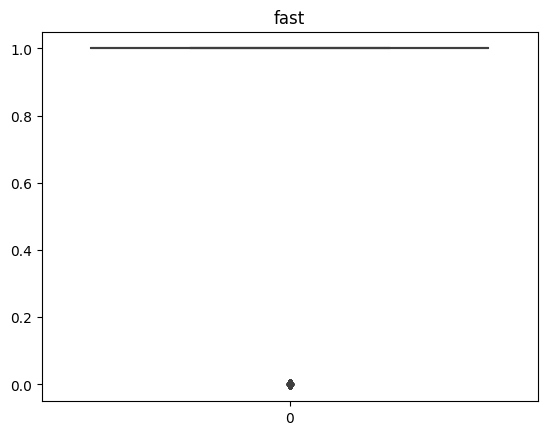

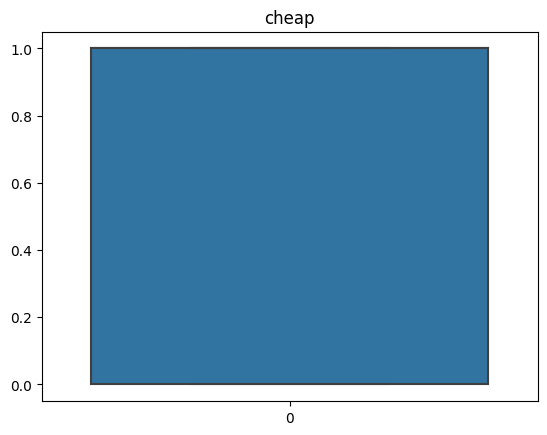

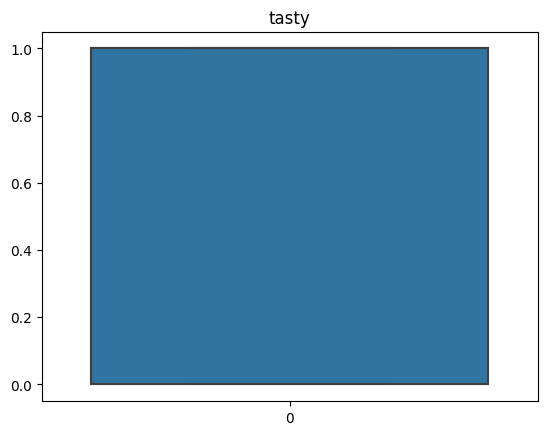

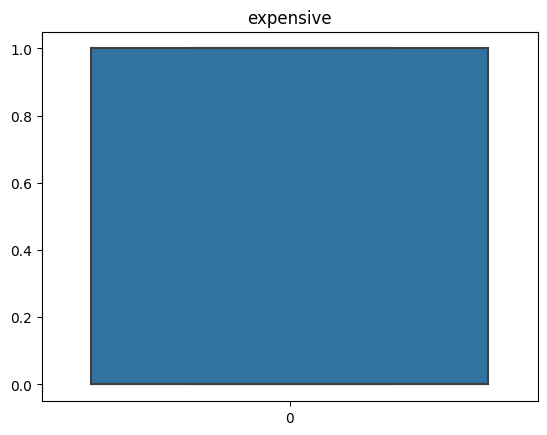

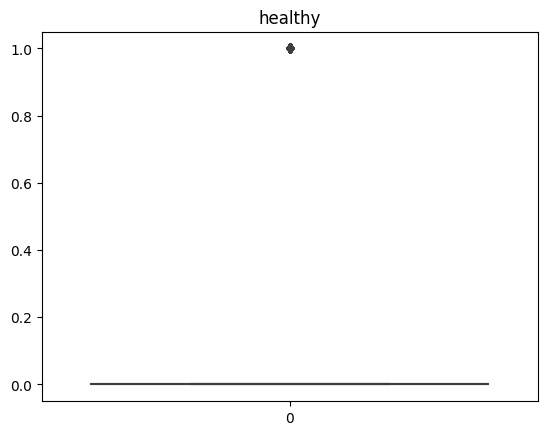

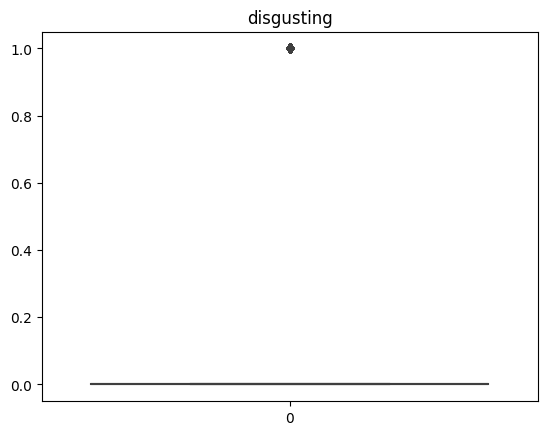

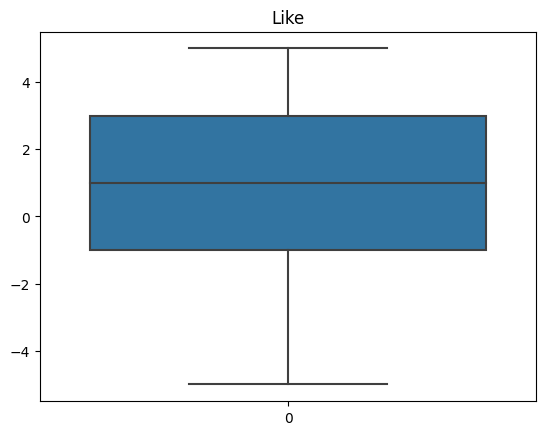

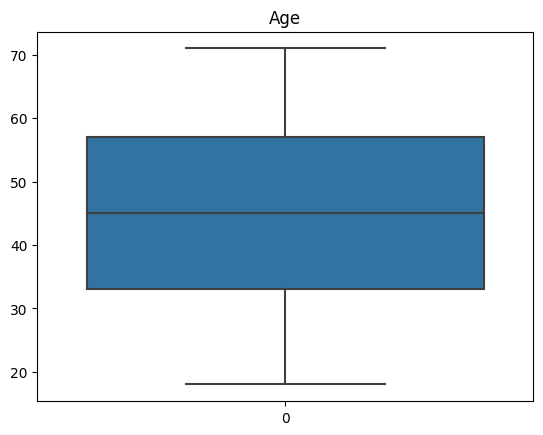

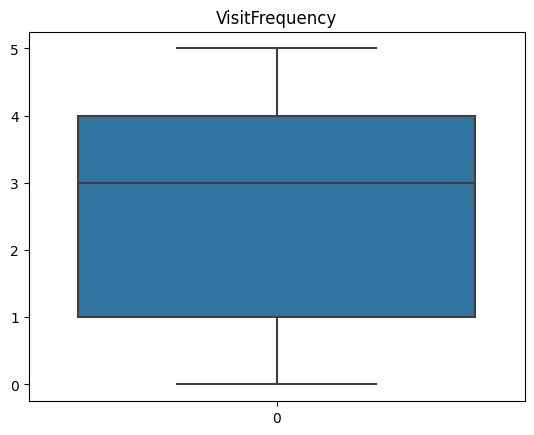

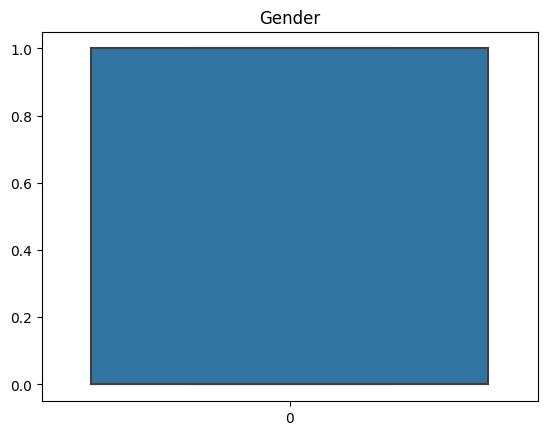

In [32]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

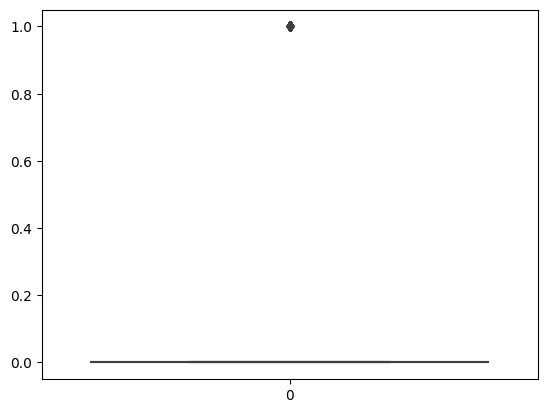

In [33]:
sns.boxplot(df['spicy'])
plt.show()


In [34]:
df.spicy.unique()

array([0, 1])

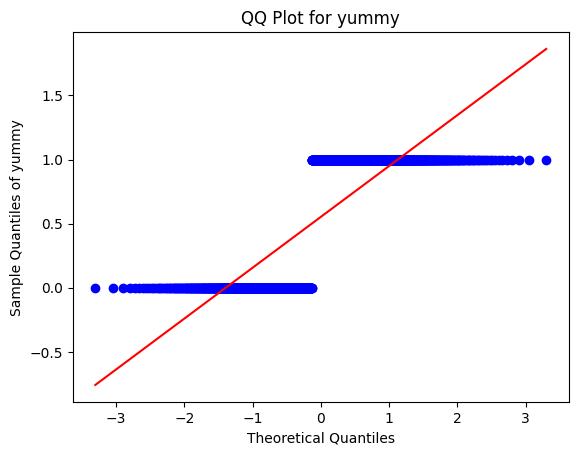

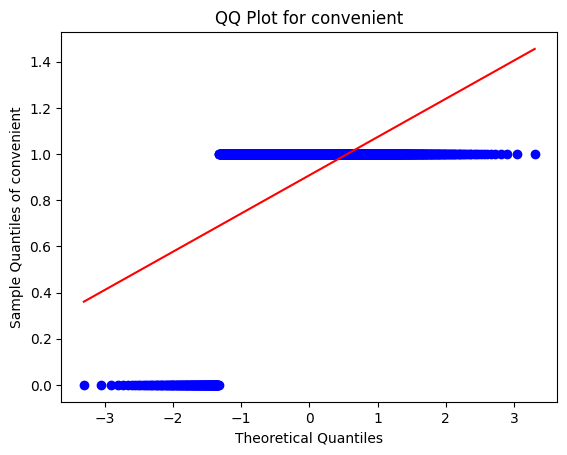

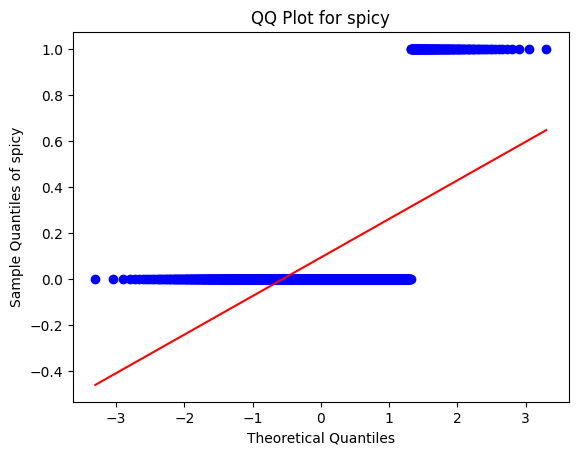

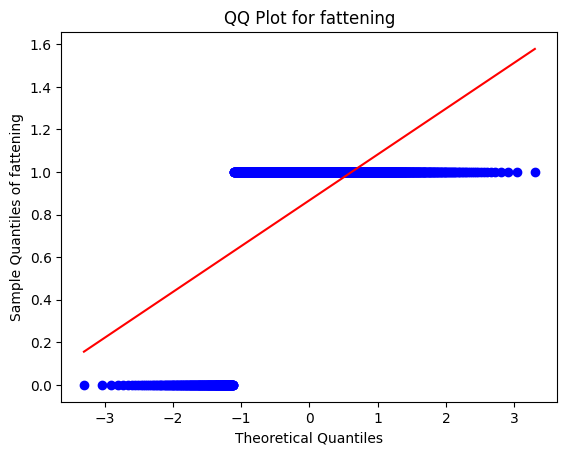

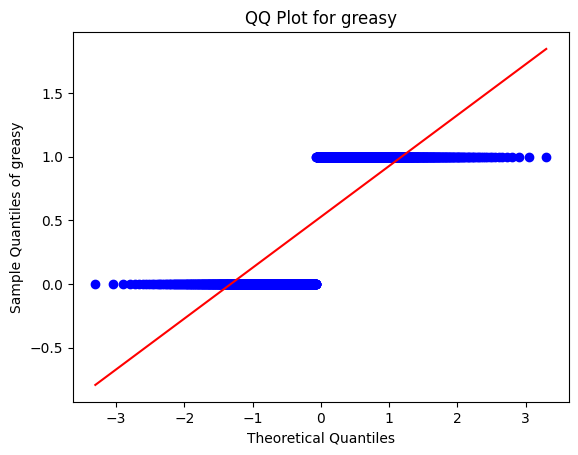

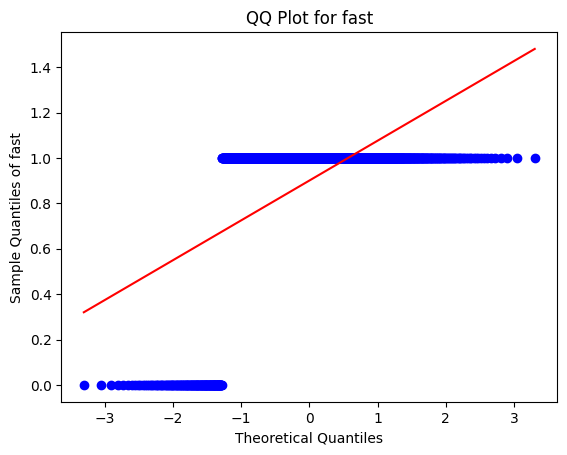

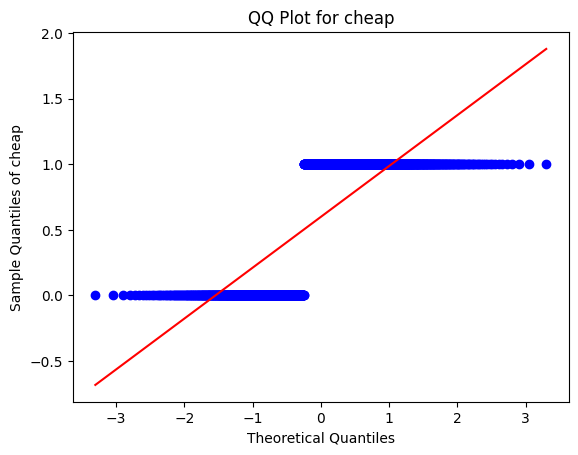

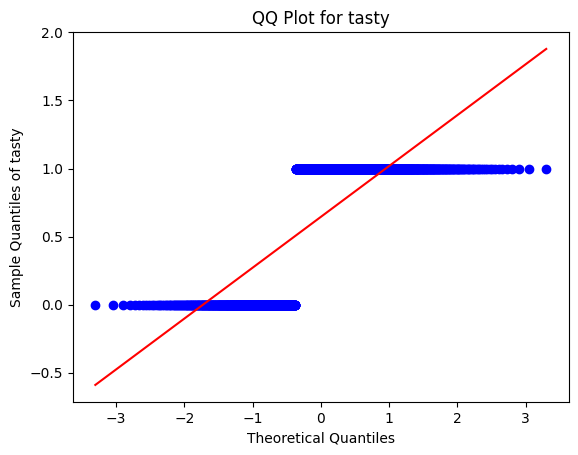

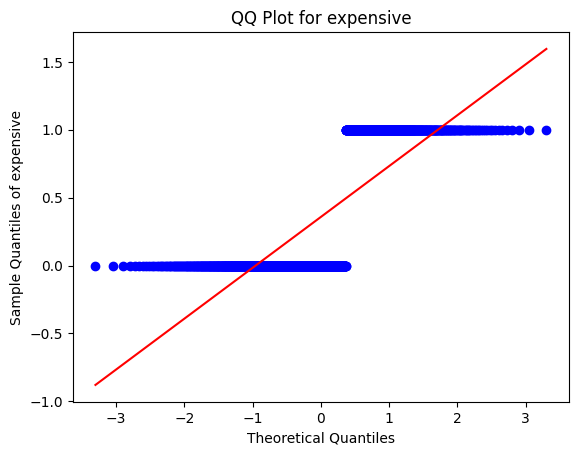

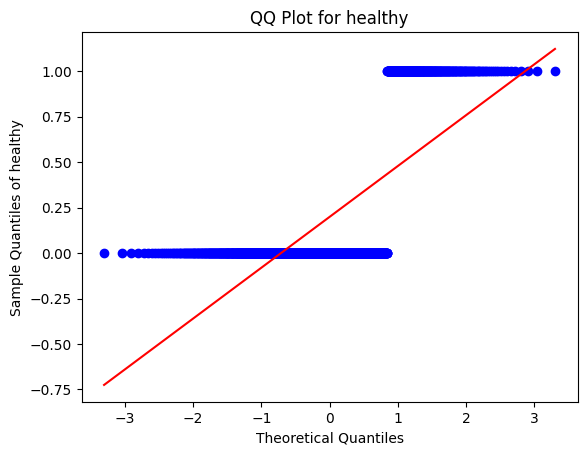

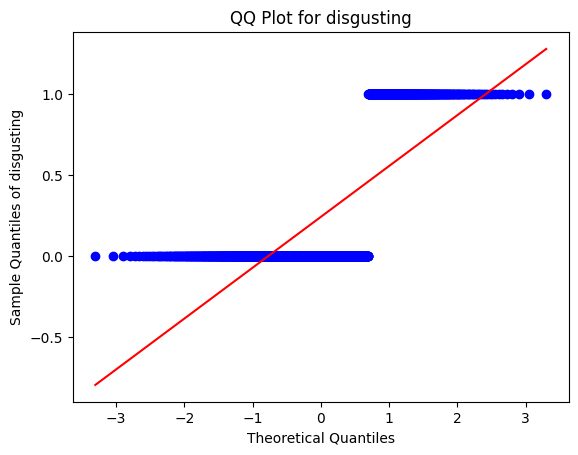

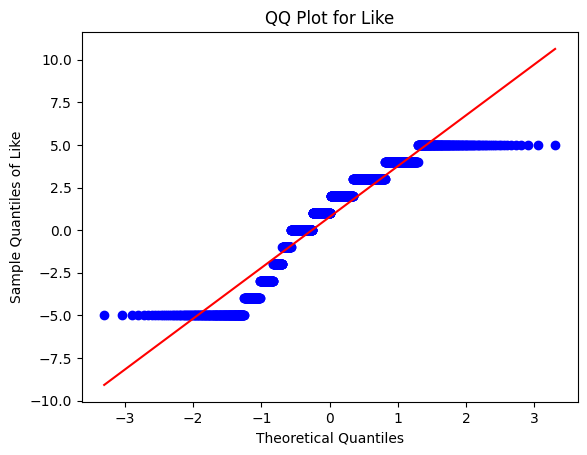

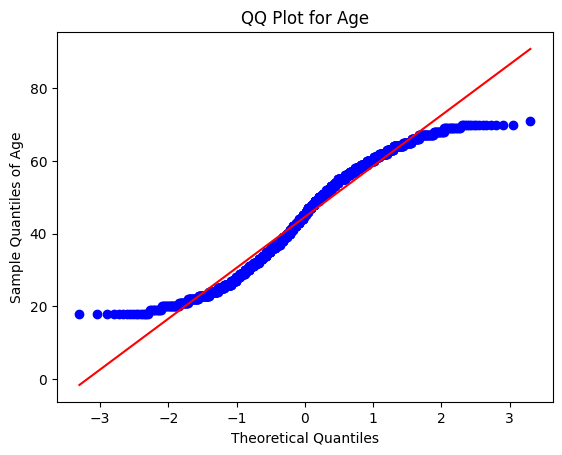

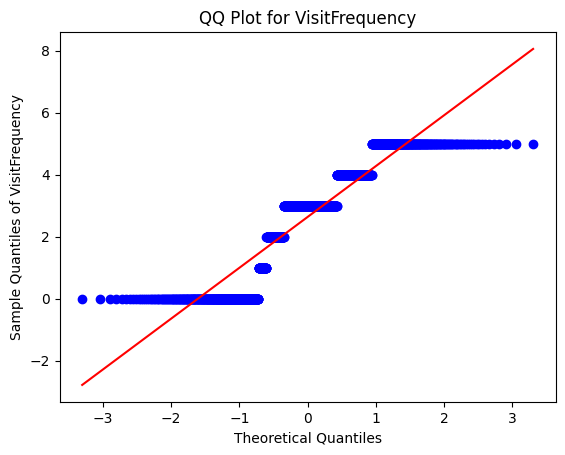

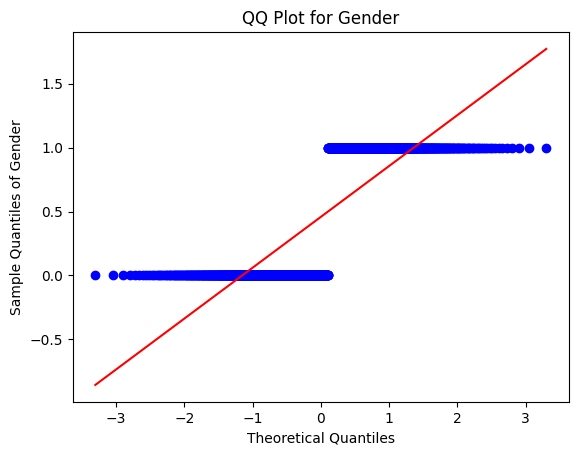

In [35]:
for col in df.columns:
    sts.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel(f"Sample Quantiles of {col}")
    plt.show()

## Splitting of data into independent and dependent variables

In [36]:
x=df.drop(['VisitFrequency'],axis=1)

In [37]:
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,1


In [38]:
x.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'Gender'],
      dtype='object')

In [39]:
y=df['VisitFrequency']
y.head()

0    0
1    0
2    0
3    4
4    3
Name: VisitFrequency, dtype: int64

In [40]:
y.value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [41]:
y.shape

(1453,)

## Scaling the variables

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_columns=x.columns
scaled=scaler.fit_transform(x)

In [43]:
x_scaled=pd.DataFrame(scaled,columns=x_columns)
x_scaled.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488,-1.212225,1.153258,-0.918645
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488,0.392515,0.449839,-0.918645
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488,0.071567,1.223600,-0.918645
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261,1.034411,1.715993,-0.918645
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488,0.392515,0.309156,1.088560


## Train,Test and Split

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0,stratify=y)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1162, 14), (291, 14), (1162,), (291,))

In [46]:
# calculating the error value of k in the given range

In [49]:
!pip install lazypredict


In [50]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [53]:
from lazypredict.Supervised import LazyRegressor


In [54]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(x_train, x_test, y_train, y_test)
models

 21%|██▏       | 9/42 [00:01<00:05,  6.31it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 79%|███████▊  | 33/42 [00:04<00:01,  7.32it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:05<00:00,  7.89it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 1162, number of used features: 14
[LightGBM] [Info] Start training from score 2.640275


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,-0.05,-0.00,1.76,0.04
LarsCV,-0.05,-0.00,1.76,0.06
DummyRegressor,-0.05,-0.00,1.76,0.03
ElasticNet,-0.05,-0.00,1.76,0.02
ElasticNetCV,-0.05,-0.00,1.76,0.26
LassoLarsIC,-0.05,-0.00,1.76,0.03
LassoLars,-0.05,-0.00,1.76,0.03
LassoCV,-0.05,-0.00,1.76,0.16
Lasso,-0.05,-0.00,1.76,0.02


In [55]:
from lazypredict.Supervised import LazyClassifier

In [56]:
x_scaled

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
0,-1.11,0.32,-0.32,0.39,-1.05,0.33,0.82,-1.35,1.34,-0.50,-0.57,-1.21,1.15,-0.92
1,0.90,0.32,-0.32,0.39,0.95,0.33,0.82,0.74,1.34,-0.50,-0.57,0.39,0.45,-0.92
2,-1.11,0.32,3.11,0.39,0.95,0.33,-1.22,0.74,1.34,2.01,-0.57,0.07,1.22,-0.92
3,0.90,0.32,-0.32,0.39,0.95,0.33,0.82,0.74,-0.75,-0.50,1.77,1.03,1.72,-0.92
4,-1.11,0.32,-0.32,0.39,0.95,0.33,0.82,-1.35,-0.75,2.01,-0.57,0.39,0.31,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.11,0.32,-0.32,0.39,0.95,-3.00,-1.22,-1.35,1.34,-0.50,1.77,-1.85,0.17,1.09
1449,0.90,0.32,-0.32,0.39,-1.05,-3.00,0.82,0.74,-0.75,2.01,-0.57,0.39,-0.61,-0.92
1450,0.90,0.32,-0.32,0.39,-1.05,0.33,-1.22,0.74,1.34,-0.50,-0.57,0.71,0.52,-0.92
1451,0.90,0.32,-0.32,-2.56,-1.05,0.33,0.82,0.74,-0.75,2.01,-0.57,1.03,-0.25,1.09


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)

In [58]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

 93%|█████████▎| 27/29 [00:03<00:00, 11.69it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 1162, number of used features: 14
[LightGBM] [Info] Start training from score -1.419543
[LightGBM] [Info] Start training from score -3.344326
[LightGBM] [Info] Start training from score -2.472930
[LightGBM] [Info] Start training from score -1.174576
[LightGBM] [Info] Start training from score -1.795208
[LightGBM] [Info] Start training from score -1.810874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:04<00:00,  7.23it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.32,0.39,None,0.31,0.02
LinearDiscriminantAnalysis,0.44,0.36,None,0.40,0.04
LogisticRegression,0.44,0.36,None,0.40,0.04
AdaBoostClassifier,0.36,0.36,None,0.35,0.14
PassiveAggressiveClassifier,0.36,0.33,None,0.36,0.02
XGBClassifier,0.36,0.33,None,0.36,0.27
BernoulliNB,0.39,0.32,None,0.34,0.01
LinearSVC,0.40,0.32,None,0.34,0.40
GaussianNB,0.20,0.32,None,0.18,0.02


## Decision Tree Classifier

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
clf = DecisionTreeClassifier(random_state=42)
#Fit the classifier to your data
decision=dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
training_accuracy=decision.score(x_train,y_train)
testing_accuracy=decision.score(x_test,y_test)
print("*** Decision Tree ***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test,pred)*100)
print("** Confusion Matrix **")
print(confusion_matrix(y_test,pred))
print("** Classification Report **")
print(classification_report(y_test,pred))

*** Decision Tree ***
Training Accuracy :  0.9810671256454389
Testing Accuracy :  0.27491408934707906
Accuracy Score :  27.491408934707906
** Confusion Matrix **
[[15  3  4 21  7 11]
 [ 2  0  0  4  6  1]
 [ 4  0 17  1  1 10]
 [23  5  1 27 19  5]
 [ 8  4  0 18 10  2]
 [17  1 15 12  6 11]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.22      0.25      0.23        61
           1       0.00      0.00      0.00        13
           2       0.46      0.52      0.49        33
           3       0.33      0.34      0.33        80
           4       0.20      0.24      0.22        42
           5       0.28      0.18      0.22        62

    accuracy                           0.27       291
   macro avg       0.25      0.25      0.25       291
weighted avg       0.28      0.27      0.27       291



In [61]:
ac=accuracy_score(y_test,pred)*100
ac

27.491408934707906

## KNN algorithm

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
error=[]
for i in range (1,100):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i !=y_test))


Text(0, 0.5, 'mean error')

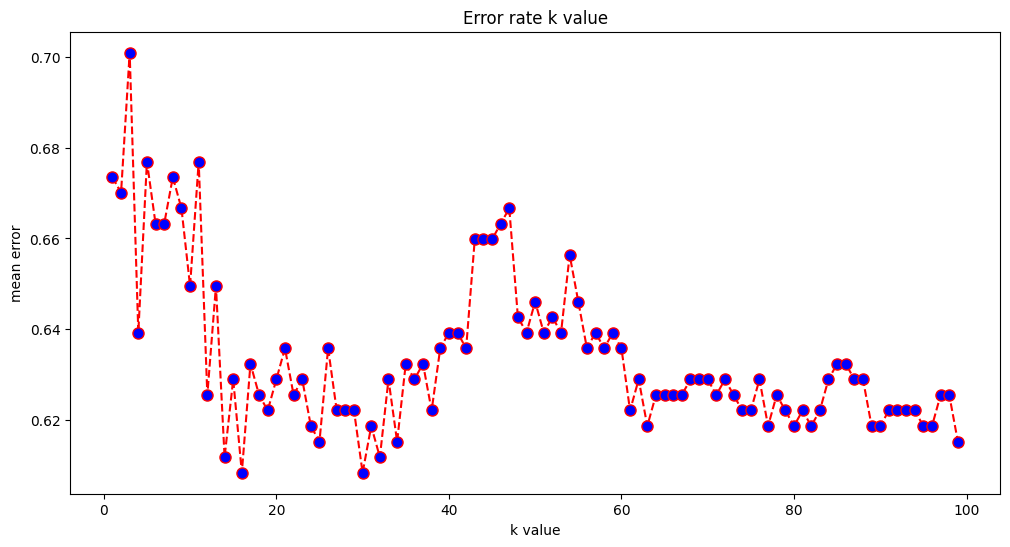

In [64]:
plt.figure(figsize=(12,6))
plt.plot(range(1,100),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=8)
plt.title('Error rate k value')
plt.xlabel('k value')
plt.ylabel('mean error')

In [65]:
# so the lowest error can be seen at k = 65

In [66]:
knn = KNeighborsClassifier(n_neighbors=65, metric='minkowski',p=3)
model=knn.fit(x_train, y_train)

In [ ]:
#prediction of all the test data

In [67]:
y_pred = model.predict(x_test)
pred=model.predict(x_train)
y_pred_reshaped = y_pred.reshape(len(y_pred), 1)
y_test_reshaped = y_test.values.reshape(len(y_test), 1)  # Convert Series to NumPy array using .values

# Concatenate and print the predictions and actual values
print(np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1))
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[3 3]
 [2 5]
 [4 4]
 [3 3]
 [3 0]
 [0 0]
 [0 5]
 [3 5]
 [2 5]
 [2 2]
 [3 3]
 [0 5]
 [2 5]
 [3 3]
 [3 4]
 [5 5]
 [0 5]
 [3 0]
 [5 5]
 [3 3]
 [2 5]
 [3 0]
 [5 3]
 [3 5]
 [2 5]
 [3 3]
 [3 3]
 [3 4]
 [0 5]
 [3 3]
 [0 0]
 [3 3]
 [3 0]
 [3 4]
 [3 4]
 [3 3]
 [3 3]
 [3 1]
 [3 3]
 [3 3]
 [3 3]
 [5 2]
 [3 3]
 [2 2]
 [2 5]
 [3 3]
 [5 5]
 [5 2]
 [5 0]
 [3 4]
 [3 3]
 [5 0]
 [2 5]
 [3 3]
 [3 4]
 [3 3]
 [3 0]
 [3 3]
 [5 5]
 [0 3]
 [3 0]
 [3 0]
 [5 5]
 [3 4]
 [3 5]
 [3 3]
 [3 4]
 [2 2]
 [2 1]
 [5 2]
 [3 3]
 [3 4]
 [3 3]
 [3 1]
 [3 4]
 [2 5]
 [3 0]
 [5 2]
 [4 3]
 [3 3]
 [0 3]
 [5 5]
 [2 5]
 [0 3]
 [3 4]
 [3 5]
 [3 4]
 [3 0]
 [0 3]
 [0 2]
 [3 3]
 [3 3]
 [3 3]
 [0 5]
 [3 5]
 [3 0]
 [3 5]
 [3 5]
 [5 2]
 [3 0]
 [5 5]
 [0 0]
 [3 3]
 [3 3]
 [3 3]
 [3 0]
 [3 3]
 [0 0]
 [2 5]
 [3 3]
 [5 5]
 [5 0]
 [0 2]
 [3 3]
 [3 4]
 [3 3]
 [3 5]
 [3 3]
 [3 3]
 [5 0]
 [3 1]
 [0 2]
 [5 5]
 [3 1]
 [5 0]
 [3 3]
 [5 2]
 [0 5]
 [3 0]
 [0 5]
 [3 3]
 [3 3]
 [5 0]
 [3 1]
 [2 0]
 [2 2]
 [3 0]
 [3 0]
 [3 3]
 [3 4]
 [3 4]
 [3 5]
 [3 4]

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
print("*** KNN ***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test, y_pred))
print("** Confusion Matrix **")
print(confusion_matrix(y_test,y_pred))
print("** Classification Report **")
print(classification_report(y_train, pred))
print(classification_report(y_test,y_pred))

*** KNN ***
Training Accuracy :  0.9810671256454389
Testing Accuracy :  0.27491408934707906
Accuracy Score :  0.38831615120274915
** Confusion Matrix **
[[ 9  0  2 37  1 12]
 [ 0  0  1 12  0  0]
 [ 6  0 14  1  0 12]
 [ 8  0  1 68  1  2]
 [ 2  0  1 36  2  1]
 [11  0 12 19  0 20]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.37      0.30      0.33       281
           1       0.00      0.00      0.00        41
           2       0.50      0.39      0.44        98
           3       0.41      0.78      0.54       359
           4       0.39      0.05      0.08       193
           5       0.39      0.31      0.35       190

    accuracy                           0.41      1162
   macro avg       0.34      0.31      0.29      1162
weighted avg       0.39      0.41      0.35      1162

              precision    recall  f1-score   support

           0       0.25      0.15      0.19        61
           1       0.00      0.00      0

## Logistic Regresion

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
def Logistic(x_train,x_test,y_train,y_test):
    lgr=LogisticRegression()
    logistic=lgr.fit(x_train,y_train)
    predict_logistic=logistic.predict(x_test)
    training_accuracy=logistic.score(x_train,y_train)
    testing_accuracy=logistic.score(x_test,y_test)
    print("*** Logistic Regression ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_logistic))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_logistic))
    print("** Classification Report **")
    print(classification_report(y_test,predict_logistic))

In [72]:
Logistic(x_train,x_test,y_train,y_test)

*** Logistic Regression ***
Training Accuracy :  0.45008605851979344
Testing Accuracy :  0.436426116838488
Accuracy Score :  0.436426116838488
** Confusion Matrix **
[[15  0  3 29  1 13]
 [ 0  0  0 11  2  0]
 [ 1  0 18  2  0 12]
 [11  0  0 63  3  3]
 [ 3  0  0 30  9  0]
 [16  0 13 11  0 22]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.33      0.25      0.28        61
           1       0.00      0.00      0.00        13
           2       0.53      0.55      0.54        33
           3       0.43      0.79      0.56        80
           4       0.60      0.21      0.32        42
           5       0.44      0.35      0.39        62

    accuracy                           0.44       291
   macro avg       0.39      0.36      0.35       291
weighted avg       0.43      0.44      0.40       291



## RANDOM FOREST CLASSIFIER

In [73]:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()

In [74]:
def Random_Forest(x_train,x_test,y_train,y_test):
    rdf=RandomForestClassifier()
    random=rdf.fit(x_train,y_train)
    predict_random=random.predict(x_test)
    predict_model=random.predict(x_train)
    training_accuracy=random.score(x_train,y_train)
    testing_accuracy=random.score(x_test,y_test)
    print("*** Random Forest ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test, predict_random))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test, predict_random))
    print("** Classification Report **")
    print(classification_report(y_train, predict_model))
    print(classification_report(y_test, predict_random))

In [75]:
Random_Forest(x_train,x_test,y_train,y_test)

*** Random Forest ***
Training Accuracy :  0.9810671256454389
Testing Accuracy :  0.3470790378006873
Accuracy Score :  0.3470790378006873
** Confusion Matrix **
[[17  0  5 19  6 14]
 [ 1  1  0  7  4  0]
 [ 5  0 15  2  0 11]
 [25  1  1 37 11  5]
 [ 8  0  1 20 12  1]
 [16  0 16 10  1 19]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       281
           1       0.95      0.98      0.96        41
           2       1.00      0.99      0.99        98
           3       0.97      0.98      0.98       359
           4       0.99      0.94      0.97       193
           5       0.99      1.00      1.00       190

    accuracy                           0.98      1162
   macro avg       0.98      0.98      0.98      1162
weighted avg       0.98      0.98      0.98      1162

              precision    recall  f1-score   support

           0       0.24      0.28      0.26        61
           1       0.50      0.0

In [76]:
from sklearn.calibration import CalibratedClassifierCV

In [77]:
base_classifier = LogisticRegression(max_iter=1000)

# Creating the CalibratedClassifierCV object using sigmoid calibration method
calibrated_classifier = CalibratedClassifierCV(base_classifier, method='sigmoid', cv=3)

# Training the CalibratedClassifierCV
calibrated_classifier.fit(x_train, y_train)

CalibratedClassifierCV(cv=3, estimator=LogisticRegression(max_iter=1000))

In [78]:
predicted_classes = calibrated_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4054982817869416


In [79]:
print("*** Calibrated Classifier CV ***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test, predicted_classes ))
print("** Confusion Matrix **")
print(confusion_matrix(y_test, predicted_classes ))
print("** Classification Report **")
print(classification_report(y_test,predicted_classes ))

*** Calibrated Classifier CV ***
Training Accuracy :  0.9810671256454389
Testing Accuracy :  0.27491408934707906
Accuracy Score :  0.4054982817869416
** Confusion Matrix **
[[10  0  3 38  0 10]
 [ 0  0  0 12  1  0]
 [ 1  0 16  3  0 13]
 [ 8  0  0 68  1  3]
 [ 1  0  0 38  2  1]
 [14  0 11 15  0 22]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.29      0.16      0.21        61
           1       0.00      0.00      0.00        13
           2       0.53      0.48      0.51        33
           3       0.39      0.85      0.54        80
           4       0.50      0.05      0.09        42
           5       0.45      0.35      0.40        62

    accuracy                           0.41       291
   macro avg       0.36      0.32      0.29       291
weighted avg       0.40      0.41      0.35       291



## Cross Validation

In [81]:
cv_values = [3, 5, 7, 10, 12, 15]
cv_scores = {}
# Iterate over cv values and evaluate model performance
for cv in cv_values:
    knn = KNeighborsClassifier(n_neighbors=65)  # Set desired hyperparameters
    from sklearn.model_selection import cross_val_score
# Your code using cross_val_score

    scores = cross_val_score(knn, x_scaled, y, cv=cv)
    cv_scores[cv] = scores.mean()

# Print mean scores for each cv value
for cv, mean_score in cv_scores.items():
    print(f"CV: {cv}, Mean Accuracy: {mean_score}")

# Select the best cv value based on the scores
best_cv = max(cv_scores, key=cv_scores.get)
print(f"\nBest CV value: {best_cv} with mean accuracy: {cv_scores[best_cv]}")

CV: 3, Mean Accuracy: 0.38886427536849283
CV: 5, Mean Accuracy: 0.3874914089347079
CV: 7, Mean Accuracy: 0.3881888039496735
CV: 10, Mean Accuracy: 0.38681152574397737
CV: 12, Mean Accuracy: 0.3895418416655376
CV: 15, Mean Accuracy: 0.3902276632302406

Best CV value: 15 with mean accuracy: 0.3902276632302406


## Hyper Tuning

In [82]:
# Define the parameter grid to search through
param_grid = {
    'n_neighbors': [3, 5, 7, 9,20,22,36,40,54,65,70],  # values of K to try
    'weights': ['uniform', 'distance'],  # weight options
    'metric': ['euclidean', 'manhattan','minoskwi']  # distance metrics
}
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn = KNeighborsClassifier()
# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=15, scoring='accuracy')
grid_search.fit(x_train, y_train)
# Print the best parameters found
print("Best parameters:", grid_search.best_params_)
# Get the best model
best_knn = grid_search.best_estimator_
# Evaluate the model on the test set
test_accuracy = best_knn.score(x_test, y_test)
print("Test set accuracy:", test_accuracy)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 70, 'weights': 'uniform'}
Test set accuracy: 0.3711340206185567


In [83]:
#according to the best parameters let us check with the knn algorithm

In [84]:
knn = KNeighborsClassifier(n_neighbors=40, weights='uniform', metric='manhattan')
model=knn.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [85]:
print("*** KNN ***")
print("Training Accuracy : ",training_accuracy)
print("Testing Accuracy : ",testing_accuracy)
print("Accuracy Score : ",accuracy_score(y_test, y_pred))
print("** Confusion Matrix **")
print(confusion_matrix(y_test,y_pred))
print("** Classification Report **")
print(classification_report(y_test,y_pred))

*** KNN ***
Training Accuracy :  0.9810671256454389
Testing Accuracy :  0.27491408934707906
Accuracy Score :  0.38144329896907214
** Confusion Matrix **
[[14  0  1 33  1 12]
 [ 0  0  0 12  1  0]
 [ 5  0 17  0  0 11]
 [15  0  1 59  2  3]
 [ 3  0  1 35  2  1]
 [17  0 13 13  0 19]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.26      0.23      0.24        61
           1       0.00      0.00      0.00        13
           2       0.52      0.52      0.52        33
           3       0.39      0.74      0.51        80
           4       0.33      0.05      0.08        42
           5       0.41      0.31      0.35        62

    accuracy                           0.38       291
   macro avg       0.32      0.31      0.28       291
weighted avg       0.36      0.38      0.34       291



## Saving the model

In [86]:
from joblib import dump

# Save the model to a file
model_file = 'market.pkl'  # Name of the file to save the model
dump(model, model_file)

['market.pkl']